In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [4]:
print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9181286549707602


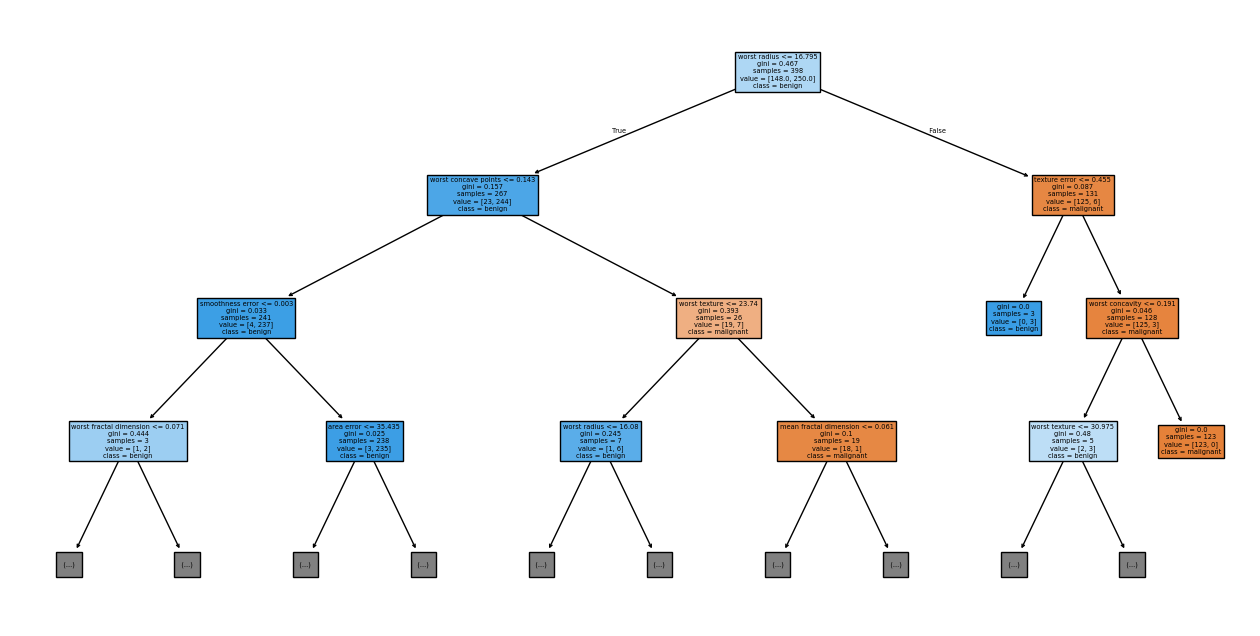

In [8]:
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True, max_depth=3)
plt.show()

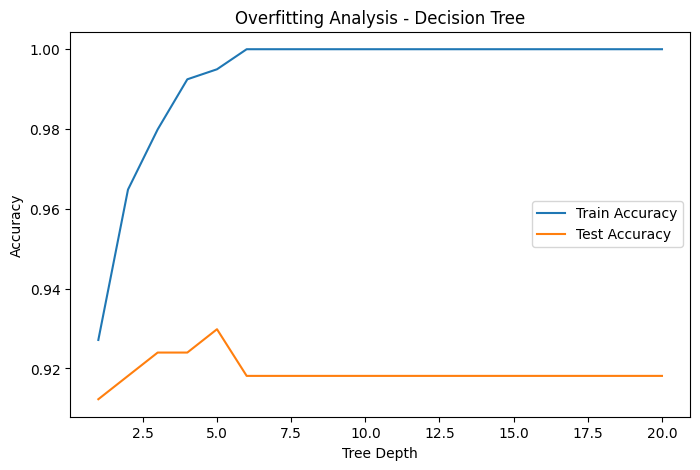

In [9]:
# Analyze Overfitting - vary max_depth
train_acc, test_acc = [], []
depths = range(1, 21)

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis - Decision Tree")
plt.legend()
plt.show()


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.935672514619883


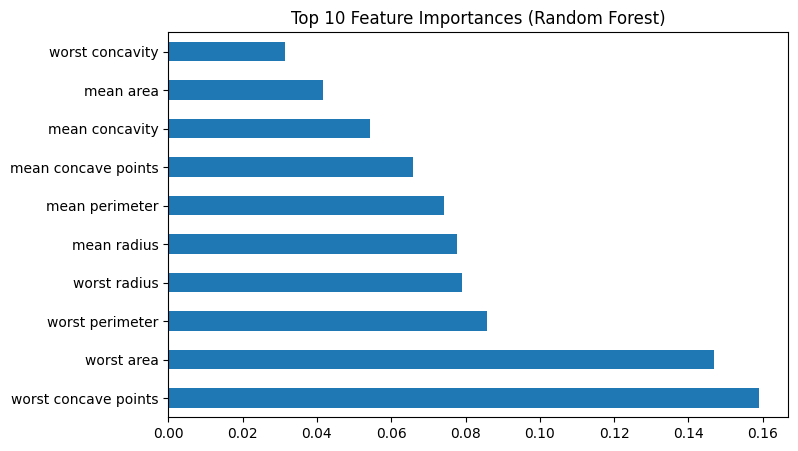

In [12]:
importances = pd.Series(rf.feature_importances_, index=data.feature_names)
importances.sort_values(ascending=False).head(10).plot(kind="barh", figsize=(8,5))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [13]:
# Cross-Validation
cv_scores_dt = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
cv_scores_rf = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv=5)

In [14]:
print("Decision Tree CV Accuracy:", cv_scores_dt.mean())
print("Random Forest CV Accuracy:", cv_scores_rf.mean())

Decision Tree CV Accuracy: 0.9173420276354604
Random Forest CV Accuracy: 0.9560937742586555


In [15]:
# Evaluation Reports
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt, target_names=data.target_names))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=data.target_names))


Decision Tree Classification Report:
               precision    recall  f1-score   support

   malignant       0.89      0.89      0.89        64
      benign       0.93      0.93      0.93       107

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171


Random Forest Classification Report:
               precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



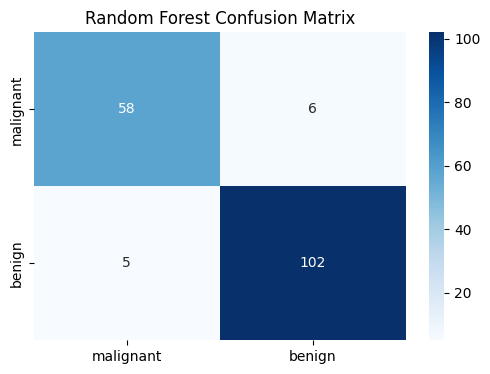

In [16]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Random Forest Confusion Matrix")
plt.show()